# MNIST Image Classification using Tensorflow & Keras

<img src="https://miro.medium.com/max/530/1*VAjYygFUinnygIx9eVCrQQ.png" alt="" width="500" height="300">

## Package Imports

In [13]:
import numpy as np
import keras as kr
import matplotlib.pyplot as plt

## Import Dataset

In [14]:
# 28x28 images of  hand written digits 0-9
# dataset contains 60000 training images and 10000 test images
# dataset is included as part of framework
mnist = kr.datasets.mnist

## Load images into Train and Test Sets

In [15]:
# Unpack data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

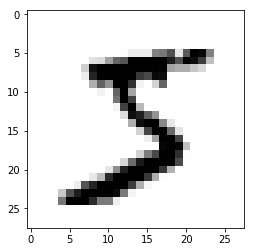

In [16]:
# uncomment for image without colour map
# plt.imshow(x_train[0])

# show first image in x training set, colour map set for black & white
plt.imshow(x_train[0], cmap=plt.cm.binary)

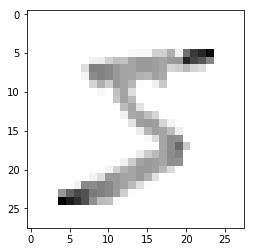

In [17]:
# values scaled between 0 and 1, makes it easier for a network to learn
x_train = kr.utils.normalize(x_train, axis=1)
x_test = kr.utils.normalize(x_test, axis=1)

# show image again after scaling
plt.imshow(x_train[0], cmap=plt.cm.binary)

## Build the model

In [19]:
# get model from keras
model = kr.models.Sequential()

# add flatten layer as input layer, CNN's may have densely connected layer at output needs to be flattened
model.add(kr.layers.Flatten())

# add hidden layer to network, 128 neurons in layer
# rectified linear activation function
model.add(kr.layers.Dense(128, activation="relu"))

# add second hidden layer to network
# relu added to both layers as seems to be cited as go to function
model.add(kr.layers.Dense(128, activation="relu"))

# add output layer, 10 neurons to match classifications from MNIST
# softmax used for probability distribution
model.add(kr.layers.Dense(10, activation="softmax"))

# compile the model, adam cited as go to optimizer to start
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# fit the model and train model
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 14s 240us/step - loss: 0.2575 - acc: 0.9241
Epoch 2/3
60000/60000 [==============================] - 11s 177us/step - loss: 0.1037 - acc: 0.9686
Epoch 3/3
60000/60000 [==============================] - 12s 204us/step - loss: 0.0706 - acc: 0.9781


In [21]:
# check values for loss & accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)

print(val_loss, val_acc)

10000/10000 [==============================] - 1s 80us/step
0.09158803310282529 0.9715


## Save the Model

In [22]:
model.save('mnist_num_reader.model')

## Load the Model

In [24]:
new_model = kr.models.load_model('mnist_num_reader.model')

## Make A Prediction

In [25]:
predictions = new_model.predict([x_test])

# use numpy to help make a prediction on x_test set
print('At predictions index 0, number is a ', np.argmax(predictions[0]))

At predictions index 0, number is a  7


## Check prediction is Correct!

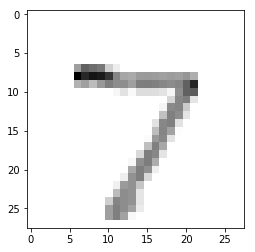

In [26]:
# show image
plt.imshow(x_test[0], cmap=plt.cm.binary)